Estudi del K-means

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

c:\Users\aluce\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
df = pd.read_csv(r"C:\Users\aluce\Documents\enginyeria de dades\aprenentatge computacional\projecte\Data Carrard.csv")
df

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,1781,21,2,1,1,1,0,45,3,0,106,63,39,28,0.619048,41,39,23,4,34
882,1785,20,2,2,1,0,0,13,3,0,113,67,40,21,0.809524,26,41,17,5,24
883,1787,19,1,1,1,0,0,50,5,0,100,50,31,24,0.547619,14,45,15,8,31
884,1789,24,5,2,1,0,0,20,2,1,120,64,39,21,0.785714,33,58,22,15,19


In [4]:
df.describe()

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,889.709932,22.383747,3.102709,1.695260,14.327314,0.563205,0.348758,25.288939,3.777652,0.224605,106.374718,58.525959,34.784424,23.150113,0.720144,18.050790,42.898420,16.878104,10.079007,24.207675
std,515.555875,3.300664,1.763937,0.472665,32.366389,0.496269,0.476847,15.927875,1.061497,0.417558,8.784012,6.570341,5.377062,4.993220,0.093570,11.478731,11.978458,5.256025,4.592609,4.633675
min,2.000000,17.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,67.000000,37.000000,18.000000,6.000000,0.357143,0.000000,20.000000,5.000000,4.000000,10.000000
25%,447.500000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.000000,3.000000,0.000000,101.000000,54.000000,31.000000,20.000000,0.666667,9.000000,34.000000,13.000000,6.000000,21.000000
50%,876.000000,22.000000,3.000000,2.000000,1.000000,1.000000,0.000000,25.000000,4.000000,0.000000,107.000000,58.000000,35.000000,23.000000,0.726190,16.000000,43.000000,17.000000,9.000000,24.000000
75%,1341.750000,24.000000,5.000000,2.000000,1.000000,1.000000,1.000000,36.000000,5.000000,0.000000,113.000000,63.000000,39.000000,26.750000,0.785714,25.000000,51.000000,20.000000,13.000000,28.000000
max,1790.000000,49.000000,6.000000,3.000000,121.000000,1.000000,1.000000,70.000000,5.000000,1.000000,125.000000,76.000000,48.000000,35.000000,0.952381,56.000000,77.000000,30.000000,24.000000,36.000000


In [9]:
def Normalize(x_train) -> object:
    scale = Normalizer().fit(x_train)
    return scale

In [10]:
def model_knn(x_train, y_train, x_test, k):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    return y_pred, knn

In [3]:
df = pd.read_csv(r"C:\Users\aluce\Documents\enginyeria de dades\aprenentatge computacional\projecte\Data Carrard.csv")
df.head()

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23


In [7]:
values = df.values
X, y = values[:, :-1], values[:, -1]

In [8]:
n_rows = X.shape[0]
n_cols = X.shape[1]
classes = np.unique(y)
n_classes = len(classes)

In [9]:
print('N Examples: %d' % n_rows)
print('N Inputs: %d' % n_cols)
print('N Classes: %d' % n_classes)
print('Classes: %s' % classes)
print('Class Breakdown:')

N Examples: 886
N Inputs: 19
N Classes: 27
Classes: [10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 30. 31. 32. 33. 34. 35. 36.]
Class Breakdown:


In [10]:
breakdown = ''
for c in classes:
    total = len(y[y == c])
    ratio = (total / float(len(y))) * 100
    print(' - Class %s: %d (%.5f%%)' % (str(c), total, ratio))

 - Class 10.0: 1 (0.11287%)
 - Class 11.0: 4 (0.45147%)
 - Class 12.0: 5 (0.56433%)
 - Class 13.0: 2 (0.22573%)
 - Class 14.0: 6 (0.67720%)
 - Class 15.0: 9 (1.01580%)
 - Class 16.0: 15 (1.69300%)
 - Class 17.0: 29 (3.27314%)
 - Class 18.0: 35 (3.95034%)
 - Class 19.0: 30 (3.38600%)
 - Class 20.0: 50 (5.64334%)
 - Class 21.0: 61 (6.88488%)
 - Class 22.0: 76 (8.57788%)
 - Class 23.0: 60 (6.77201%)
 - Class 24.0: 76 (8.57788%)
 - Class 25.0: 69 (7.78781%)
 - Class 26.0: 66 (7.44921%)
 - Class 27.0: 55 (6.20767%)
 - Class 28.0: 70 (7.90068%)
 - Class 29.0: 54 (6.09481%)
 - Class 30.0: 47 (5.30474%)
 - Class 31.0: 25 (2.82167%)
 - Class 32.0: 17 (1.91874%)
 - Class 33.0: 10 (1.12867%)
 - Class 34.0: 6 (0.67720%)
 - Class 35.0: 4 (0.45147%)
 - Class 36.0: 4 (0.45147%)


In [11]:
x_train, x_test, y_train, y_test= train_test_split(X, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
x_train_binary= np.asarray(x_train)
y_train_binary= np.asarray(y_train)

x_test_binary= np.asarray(x_test)
y_test_binary= np.asarray(y_test)

In [13]:
def Normalize(x_train) -> object:
    scale = Normalizer().fit(x_train) # the scaler is fitted to the training set
    return scale

In [14]:
scaler = Normalize(x_train_binary)
normalized_x_train_pima= scaler.transform(x_train_binary) # the scaler is applied to the training set
normalized_x_test_pima= scaler.transform(x_test_binary) # the scaler is applied to the test set

In [16]:
print('x train before Normalization')
print(x_train[0:5])
print('\nx train after Normalization')
print(normalized_x_train_pima[0:5])

x train before Normalization
[[7.2700000e+02 1.9000000e+01 1.0000000e+00 2.0000000e+00 1.2100000e+02
  0.0000000e+00 0.0000000e+00 5.0000000e+01 2.0000000e+00 0.0000000e+00
  9.6000000e+01 5.5000000e+01 3.2000000e+01 2.2000000e+01 6.1904764e-01
  5.3000000e+01 6.6000000e+01 2.3000000e+01 1.8000000e+01]
 [5.1500000e+02 2.2000000e+01 2.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 0.0000000e+00 1.5000000e+01 3.0000000e+00 0.0000000e+00
  9.1000000e+01 5.0000000e+01 3.2000000e+01 1.9000000e+01 5.7142860e-01
  2.1000000e+01 4.4000000e+01 1.9000000e+01 7.0000000e+00]
 [9.4200000e+02 2.5000000e+01 6.0000000e+00 1.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 3.6000000e+01 5.0000000e+00 0.0000000e+00
  1.1000000e+02 5.0000000e+01 2.8000000e+01 1.3000000e+01 6.1904764e-01
  9.0000000e+00 2.6000000e+01 7.0000000e+00 6.0000000e+00]
 [5.4500000e+02 2.0000000e+01 1.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 4.0000000e+01 2.0000000e+00 0.0000000e+00
  

Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

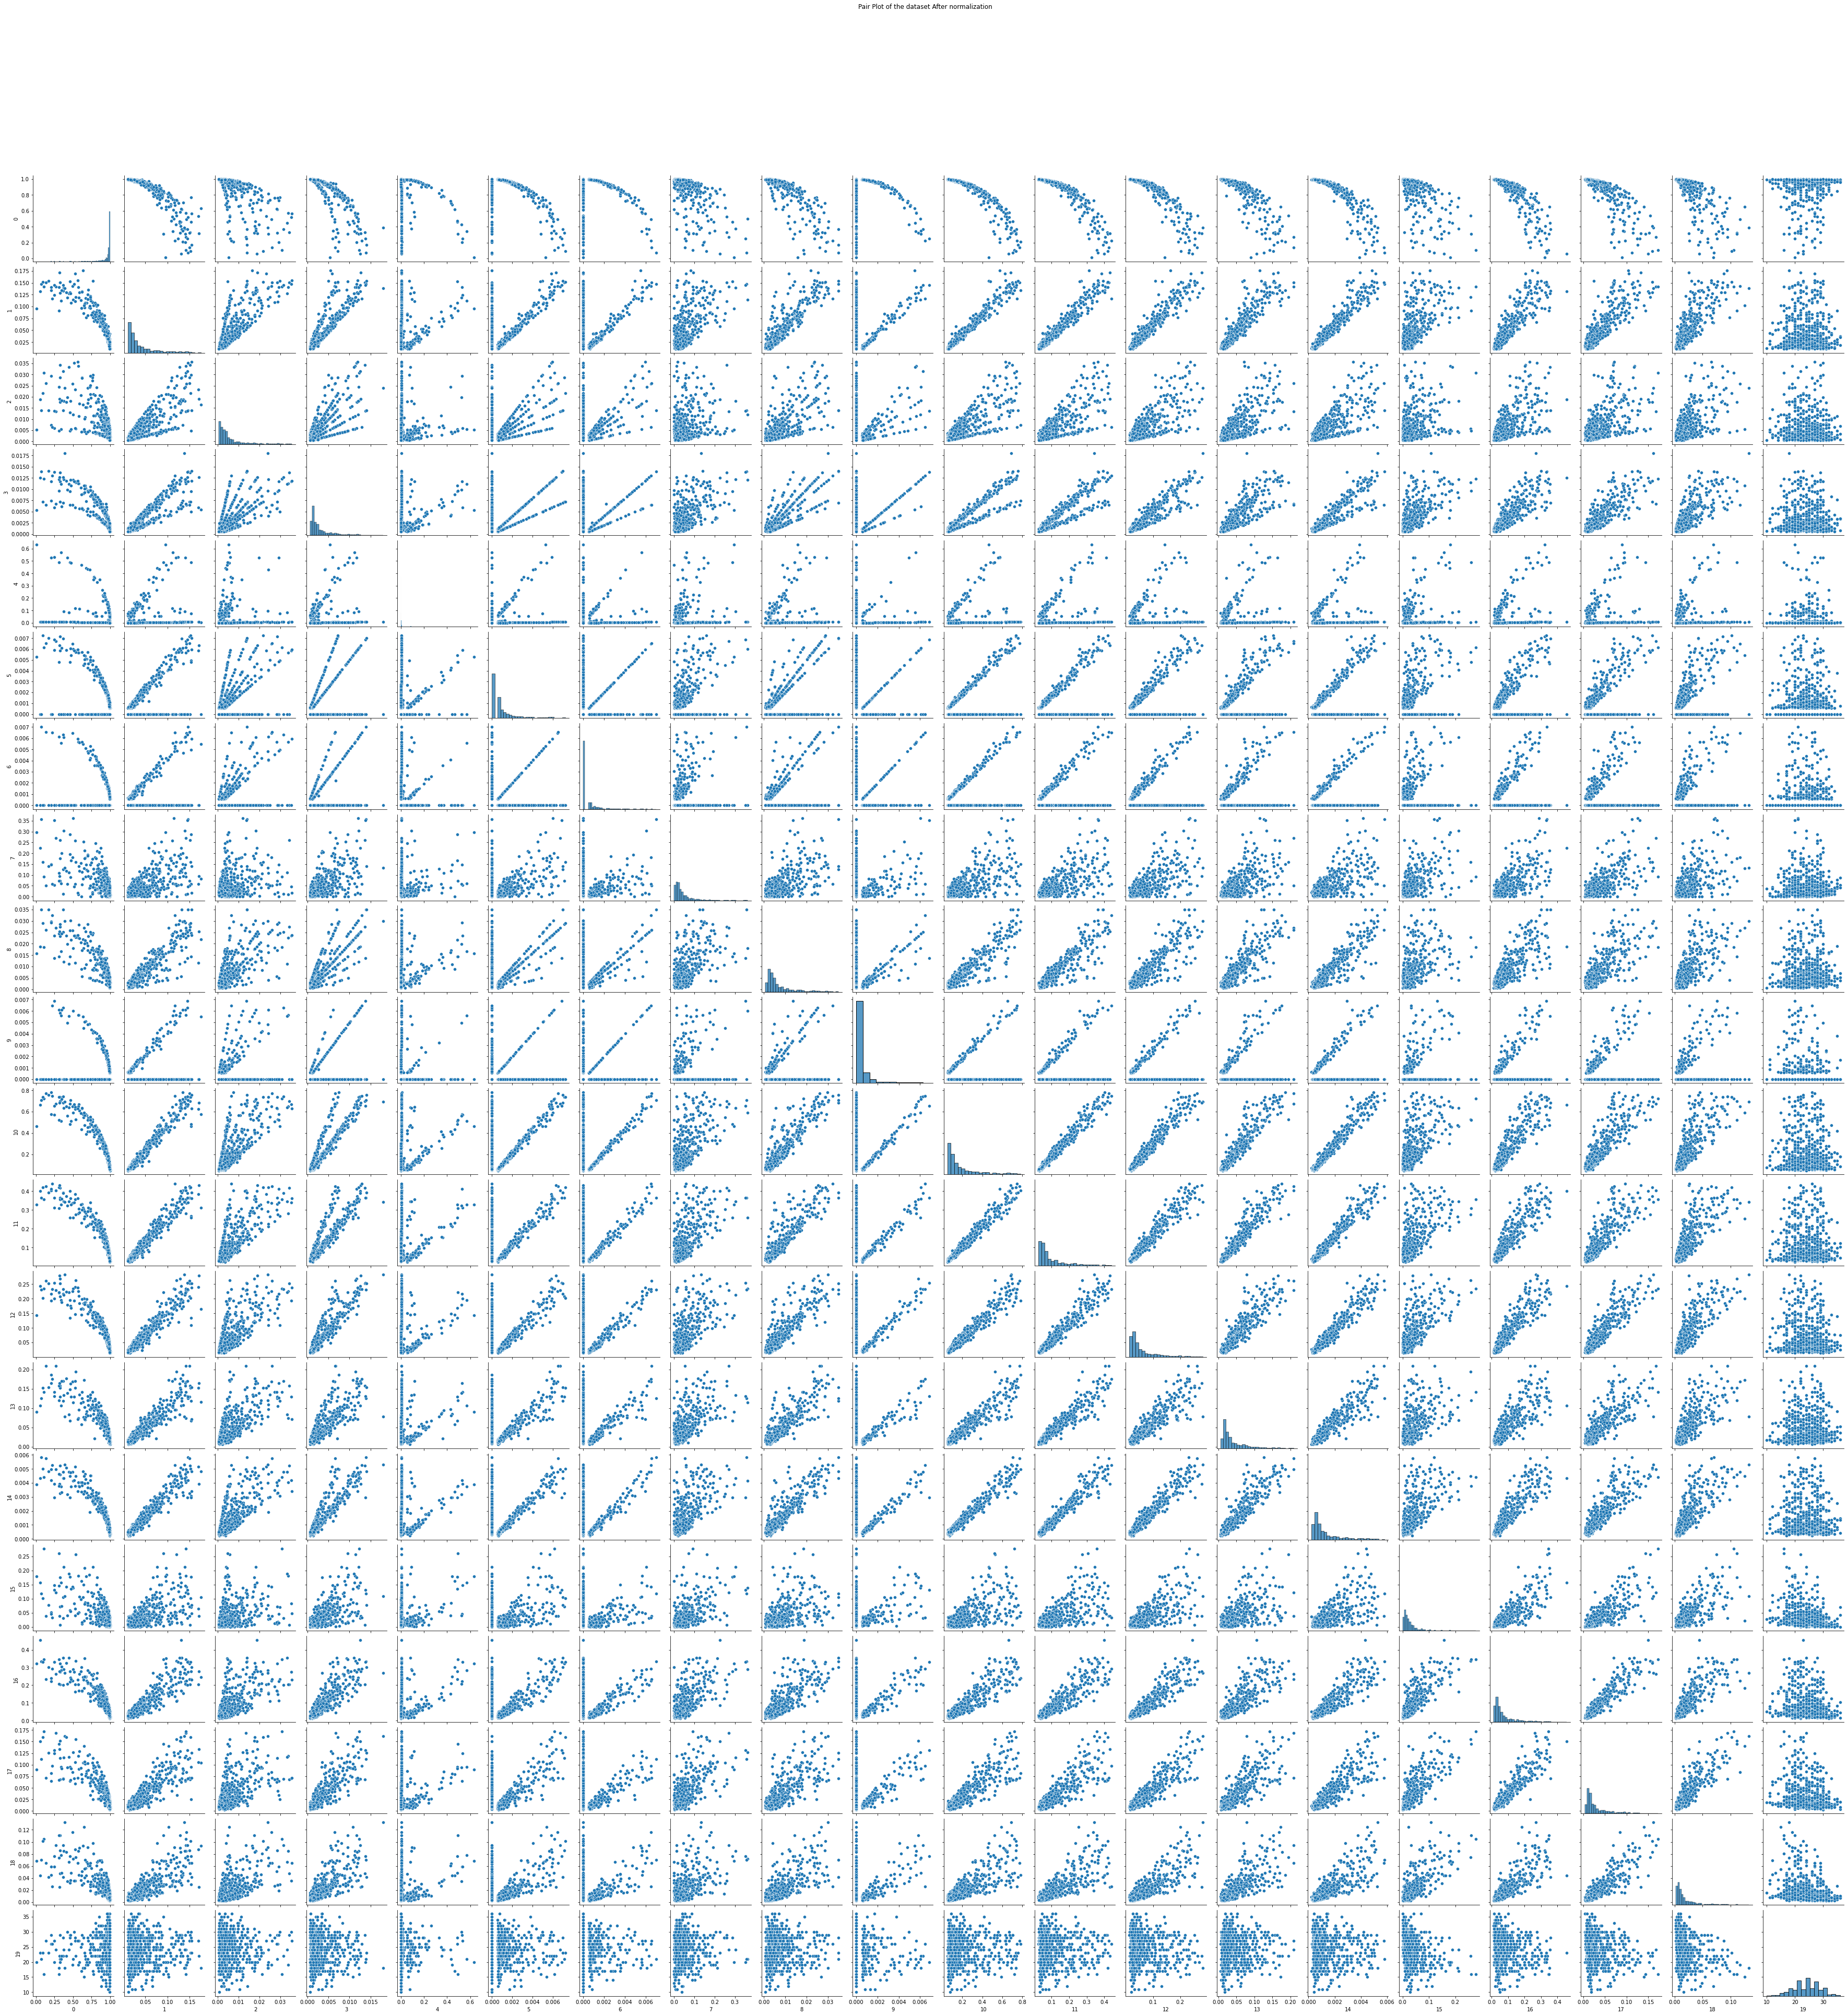

In [19]:
df2 = pd.DataFrame(data= np.c_[normalized_x_train_pima, y_train])
after= sns.pairplot(df2)
after.fig.suptitle('Pair Plot of the dataset After normalization', y=1.08)

In [26]:
def sampleig_dataset(dataset, frac):
    dataset = dataset.sample(frac=frac).reset_index(drop=True)
    return dataset